In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
geyser = sns.load_dataset("geyser")
df = geyser.copy()

In [2]:
df.head()

,duration,waiting,kind
0,3.600,79,long
1,1.800,54,short
2,3.333,74,long
3,2.283,62,short
4,4.533,85,long


In [3]:
df.shape[0]

272

In [4]:
df.columns

Index(['duration', 'waiting', 'kind'], dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   duration  272 non-null    float64
 1   waiting   272 non-null    int64  
 2   kind      272 non-null    object 
dtypes: float64(1), int64(1), object(1)
memory usage: 6.5+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,272.0,3.487783,1.141371,1.6,2.16275,4.0,4.45425,5.1
waiting,272.0,70.897059,13.594974,43.0,58.00000,76.0,82.00000,96.0


In [8]:
for item in df.columns:
    print(f"{item} ->  {df[item].unique().shape[0]}")

duration ->  126
waiting ->  51
kind ->  2


# Veri Seti Üzerinden Bilgi Edinme

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,272.0,3.487783,1.141371,1.6,2.16275,4.0,4.45425,5.1
waiting,272.0,70.897059,13.594974,43.0,58.00000,76.0,82.00000,96.0


In [10]:
df.shape

(272, 3)

# Pivot Table

In [12]:
table = pd.pivot_table(data = df, index = ["kind"])
table

,duration,waiting
kind,,
long,4.29793,80.284884
short,2.09433,54.750000


In [14]:
agglist = [np.min, np.max, np.mean, np.sum]
table = pd.pivot_table(data = df, index = ["kind"], aggfunc={
    "duration":agglist, 
    "waiting":agglist
})
table

duration                          waiting                       
          amax   amin     mean      sum    amax amin       mean    sum
kind                                                                  
long     5.100  2.383  4.29793  739.244      96   68  80.284884  13809
short    3.833  1.600  2.09433  209.433      67   43  54.750000   5475

In [16]:
table_mean = pd.pivot_table(data = df, index = ["kind"], values = ["duration", "waiting"], aggfunc=np.mean)
table_mean

,duration,waiting
kind,,
long,4.29793,80.284884
short,2.09433,54.750000


<AxesSubplot:xlabel='kind'>

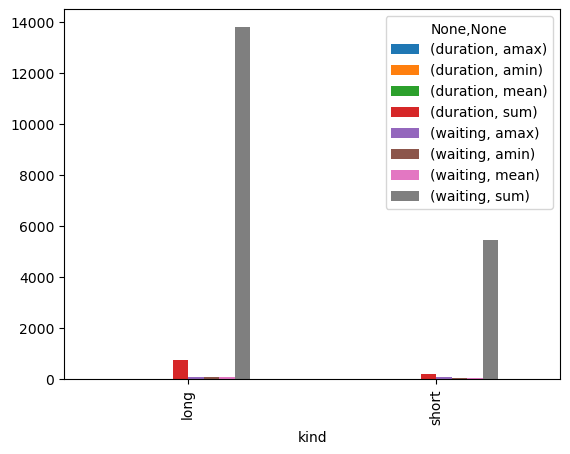

In [17]:
table.plot(kind = "bar")

# Kategorik Değişkenler

In [18]:
df.select_dtypes(include = ["category", "object"])

,kind
0,long
1,short
2,long
3,short
4,long
...,...
267,long
268,short
269,long
270,short


In [24]:
df.select_dtypes(include = ["category", "object"])["kind"].unique().shape[0]

2

# Barplot

<AxesSubplot:xlabel='kind', ylabel='duration'>

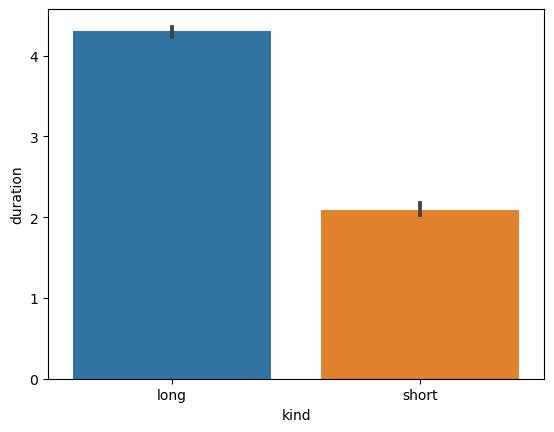

In [25]:
sns.barplot(x = "kind", y = "duration", data = df)

<AxesSubplot:xlabel='kind', ylabel='waiting'>

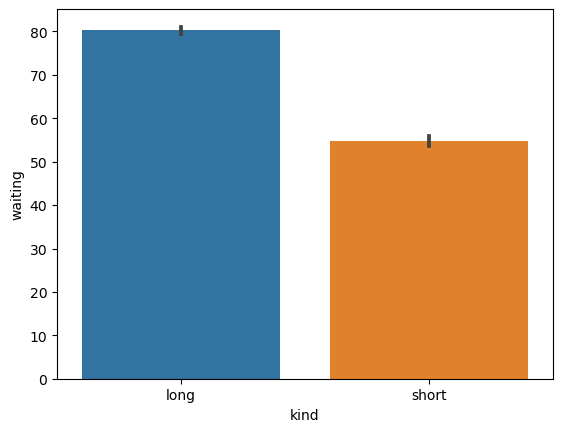

In [26]:
sns.barplot(x ="kind", y = "waiting", data = df)

In [27]:
import plotly.express as px
fig = px.bar(df, x = "kind", y = "duration", title = "Records of Duration According to Kind")
fig.show()

In [28]:
import plotly.express as px
fig = px.bar(df, x = "kind", y = "waiting", title = "Records of Waiting According to Kind")
fig.show()

In [29]:
fig = px.pie(df, names = "kind", values = "duration", title = "Records of Duration According to Kind")
fig.show();

# Catplot

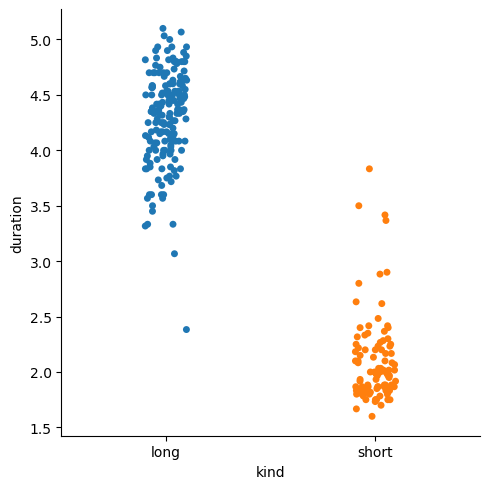

In [31]:
sns.catplot(x = "kind", y = "duration", data = df)

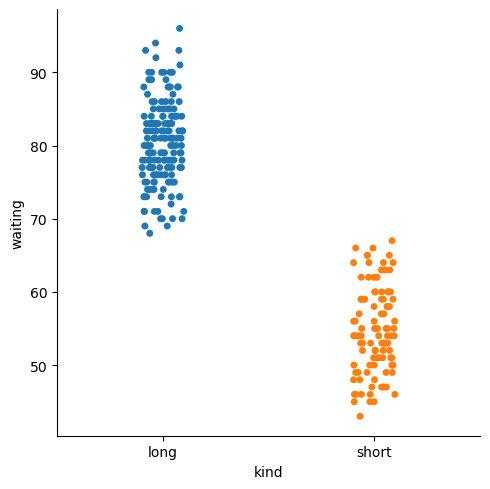

In [32]:
sns.catplot(x = "kind", y = "waiting", data = df)

# Pairplot Matris Grafik

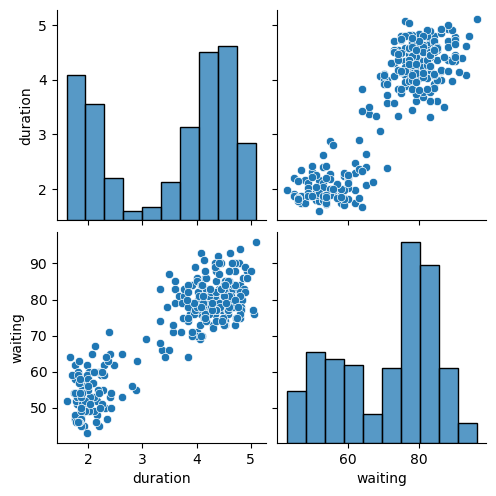

In [33]:
sns.pairplot(df)

# Heatmap

In [34]:
df_num = df.select_dtypes(include = ["float64", "int64"])
df_num.head()

,duration,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


<AxesSubplot:>

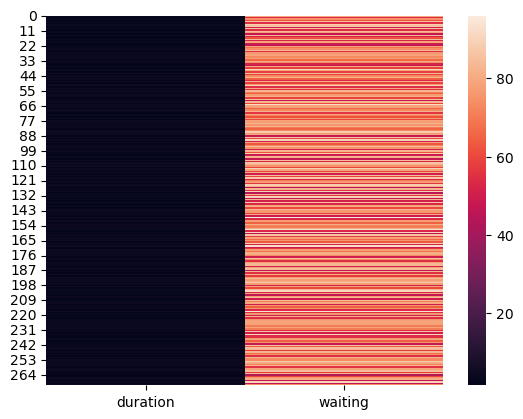

In [35]:
sns.heatmap(df_num)